# Outlier Treatments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
"""CRIM - per capita crime rate by town
ZN      - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS   - proportion of non-retail business acres per town.
CHAS    - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX     - nitric oxides concentration (parts per 10 million)
RM      - average number of rooms per dwelling
AGE     - proportion of owner-occupied units built prior to 1940
DIS     - weighted distances to five Boston employment centres
RAD     - index of accessibility to radial highways
TAX     - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT   - % lower status of the population
MEDV    - Median value of owner-occupied homes in $1000's"""

"CRIM - per capita crime rate by town\nZN      - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS   - proportion of non-retail business acres per town.\nCHAS    - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX     - nitric oxides concentration (parts per 10 million)\nRM      - average number of rooms per dwelling\nAGE     - proportion of owner-occupied units built prior to 1940\nDIS     - weighted distances to five Boston employment centres\nRAD     - index of accessibility to radial highways\nTAX     - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT   - % lower status of the population\nMEDV    - Median value of owner-occupied homes in $1000's"

In [4]:
df_boston = pd.read_csv("H:/study/360Digitmg/Assignments/Boston.csv") #we are going to import __Boston.csv__ so we can proceed


In [5]:
"""We are getting basic info outof data"""
df_boston.shape
# df_boston.columns
# df_boston.dtypes

(506, 14)

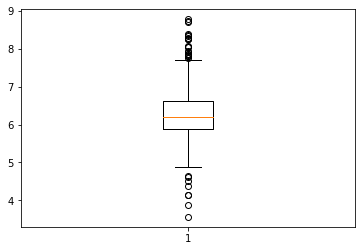

In [6]:
plt.boxplot(df_boston['rm'])
plt.show()

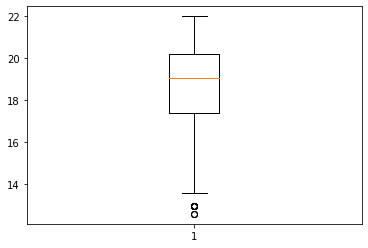

In [8]:
plt.boxplot(df_boston['ptratio'])
plt.show()

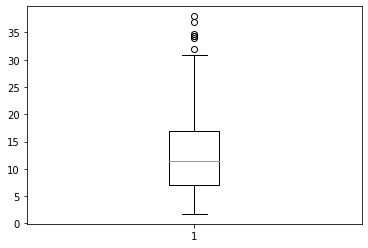

In [9]:
plt.boxplot(df_boston['lstat'])
plt.show()

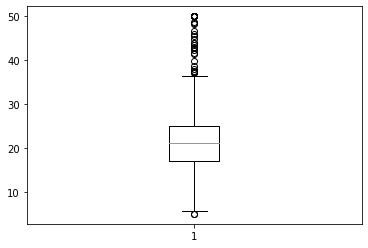

In [10]:
plt.boxplot(df_boston['medv'])
plt.show()

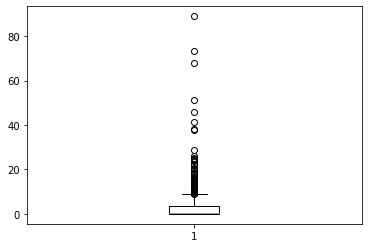

In [11]:
plt.boxplot(df_boston['crim'])
plt.show()

In [12]:
IQR_ptratio = df_boston['ptratio'].quantile(0.75) - df_boston['ptratio'].quantile(0.25)
lower_limit_ptratio = df_boston['ptratio'].quantile(0.25) - (IQR_ptratio * 1.5)
upeer_limit_ptratio = df_boston['ptratio'].quantile(0.75) - (IQR_ptratio * 1.5)

In [13]:
IQR_rm = df_boston['rm'].quantile(0.75) - df_boston['rm'].quantile(0.25)
lower_limit_rm = df_boston['rm'].quantile(0.25) - (IQR_rm * 1.5)
upeer_limit_rm = df_boston['rm'].quantile(0.75) - (IQR_rm * 1.5)

In [14]:
IQR_lstat = df_boston['lstat'].quantile(0.75) - df_boston['lstat'].quantile(0.25)
lower_limit_lstat = df_boston['lstat'].quantile(0.25) - (IQR_lstat * 1.5)
upeer_limit_lstat = df_boston['lstat'].quantile(0.75) - (IQR_lstat * 1.5)

In [15]:
IQR_medv = df_boston['medv'].quantile(0.75) - df_boston['medv'].quantile(0.25)
lower_limit_medv = df_boston['medv'].quantile(0.25) - (IQR_medv * 1.5)
upper_limit_medv = df_boston['medv'].quantile(0.75) - (IQR_medv * 1.5)

Remove (let's trim the dataset) 

In [16]:
# Trimming Technique
# let's flag the outliers in the data set
outliers_df_prtratio = np.where(df_boston['ptratio'] > upeer_limit_ptratio, True, 
                                np.where(df_boston['ptratio'] < lower_limit_ptratio, True, False))

df_trimmed_ptratio = df_boston.loc[~(outliers_df_prtratio)]
df_boston.shape,df_trimmed_ptratio.shape

((506, 14), (65, 14))

In [17]:
df_trimmed_ptratio

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358,14.8,368.24,4.97,22.5
299,0.05561,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358,14.8,371.58,4.74,29.0
300,0.04417,70.0,2.24,0,0.400,6.871,47.4,7.8278,5,358,14.8,390.86,6.07,24.8
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7


In [19]:
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


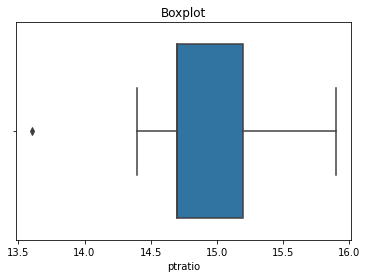

In [20]:
sns.boxplot(df_trimmed_ptratio.ptratio);plt.title('Boxplot');plt.show()

In [22]:
outliers_df_rm = np.where(df_boston['rm'] > upeer_limit_rm, True, 
                                np.where(df_boston['rm'] < lower_limit_rm, True, False))

df_trimmed_rm = df_boston.loc[~(outliers_df_rm)]
df_boston.shape,df_trimmed_rm.shape

((506, 14), (34, 14))

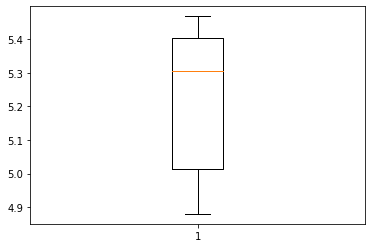

In [24]:
plt.boxplot(df_trimmed_rm['rm'])
plt.show()

In [25]:
outliers_df_lstat = np.where(df_boston['lstat'] > upeer_limit_lstat, True, 
                                np.where(df_boston['lstat'] < lower_limit_lstat, True, False))

df_trimmed_lstat = df_boston.loc[~(outliers_df_lstat)]
df_boston.shape,df_trimmed_lstat.shape

((506, 14), (2, 14))

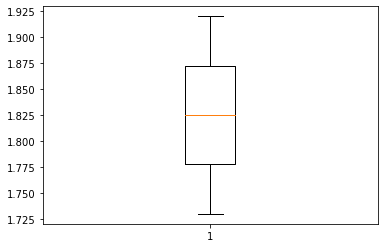

In [26]:
plt.boxplot(df_trimmed_lstat['lstat'])
plt.show()

In [27]:
outliers_df_medv = np.where(df_boston['medv'] > upper_limit_medv, True, 
                                np.where(df_boston['medv'] < lower_limit_medv, True, False))

df_trimmed_medv = df_boston.loc[~(outliers_df_medv)]
df_boston.shape,df_trimmed_medv.shape

((506, 14), (51, 14))

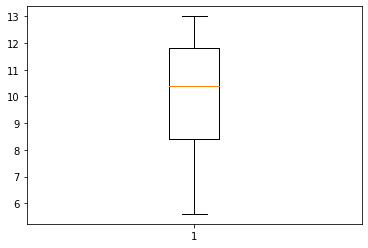

In [28]:
plt.boxplot(df_trimmed_medv['medv'])
plt.show()